<a href="https://colab.research.google.com/github/gabrielcgo/modulo2_projeto3/blob/main/modulo2_projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo clusterização e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv e faça o download do conjunto de dados.

# Exercicio 1. (3.0 pontos)

Faça um gráfico de cotovelo, quantos clusters aproximadamente melhor separam este conjunto de dados informado pelo grafico de cotovelo?

In [1]:
#### VALE 0.5 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df = pd.read_csv('Wholesale customers data.csv')
df.head(10)

In [ ]:
df = df.replace({'?': np.nan})
df = df.dropna()
df.info()

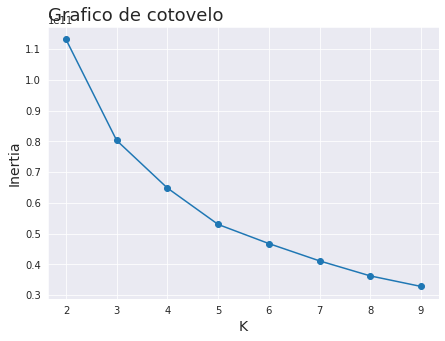

In [4]:
X = df
X_std = StandardScaler().fit_transform(X)

inertias = []
sizes = range(2, 10)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(7, 5))

pd.Series(inertias, index=sizes).plot(ax=ax, marker='o')

ax.set_title('Grafico de cotovelo', loc='left', fontsize=18)
ax.set_xlabel('K', fontsize=14)
ax.set_ylabel('Inertia', fontsize=14)

plt.show()

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar. Esta célula de texto esta escrito em Markdown, para renderizar o texto execute a célula com **Shift+Enter**)

Aproximadamente 4 à 5 clusters, que é onde está sendo a quebra da curva, apesar desta estar bem suavizada. Optei por 4 clusters pois fez mais sentido.

Construa um modelo de **clusterização K-Médias** usando o melhor numero de clusters informado pelo gráfico de cotovelo e usem o parametro **random_state** com valor 10.

In [5]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

km = KMeans(n_clusters=4, random_state=10).fit(X_std)
y_pred = km.predict(X_std)

Adicione o resultado da clusterização no conjunto de dados original, chame essa nova variavel de **cluster** e conte quantas observações há em cada cluster e preencha:

In [6]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

cluster = km.labels_
df['cluster'] = cluster

In [8]:
#### VALE 0.5 pontos
# Substitua __ pelos valores solicitados
#print('Total de observações do cluster 1: {}'.format('__'))
#print('Total de observações do cluster 2: {}'.format('__'))
#print('Total de observações do cluster 3: {}'.format('__'))
# copie a linha de cima, alterando o cluster e preenchendo o total

# Decidi fazer um pouquinho diferente para apresentar os dados, obtendo o mesmo resultado.
for c in range(4):
    observacoes = df[df['cluster'] == c][:]
    print('Total de observações do cluster {}: {}'.format(c+1, len(observacoes)))
    print(' ')
print(df.groupby(['cluster']).mean()) # Usei para analisar qual cluster escolher

Total de observações do cluster 1: 210
 
Total de observações do cluster 2: 13
 
Total de observações do cluster 3: 92
 
Total de observações do cluster 4: 125
 
          Channel    Region         Fresh          Milk       Grocery  \
cluster                                                                 
0        1.004762  3.000000  13423.571429   3172.000000   3746.371429   
1        1.846154  2.615385  25770.769231  35160.384615  41977.384615   
2        1.054348  1.315217  12407.130435   3401.771739   4234.130435   
3        2.000000  2.672000   7877.640000   8913.512000  14212.624000   

              Frozen  Detergents_Paper   Delicassen  
cluster                                              
0        3427.100000        768.219048  1267.142857  
1        6844.538462      19867.384615  7880.307692  
2        4082.282609        864.739130  1198.402174  
3        1339.280000       6149.592000  1537.168000  


# Exercicio 2. (4.0 pontos)

Escolha dois clusters e separe os dados em dois subconjuntos, chamando-os de clusterA e clusterB.

In [9]:
#### VALE 1.0 ponto
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Escolhi o cluster 1 e 2, motivado pela curiosidade em entender a relação entre o número de observações e a média dos produtos.
clusterA = df[y_pred==0]
clusterB = df[y_pred==1]

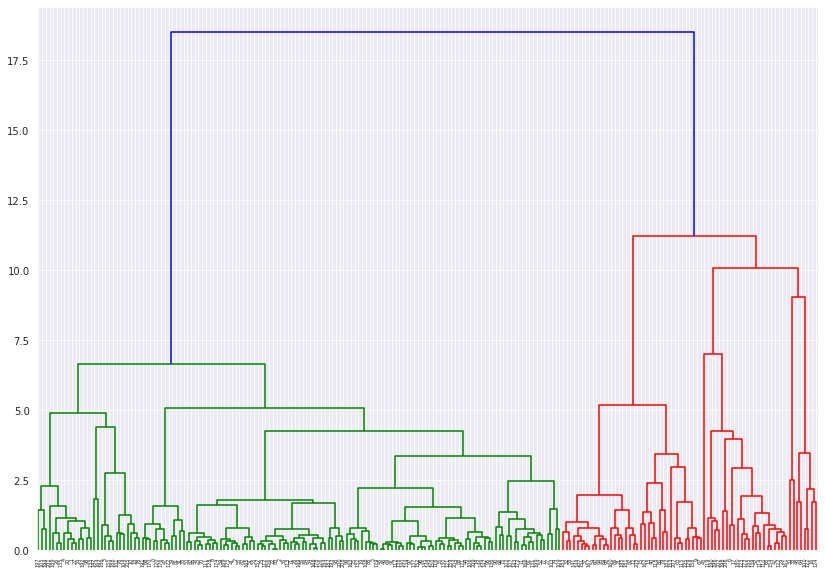

In [11]:
# Optei por fazer um dendograma pra visualizar melhor a situação...

sns.set_style('darkgrid')
plt.figure(figsize = [14,10])
ax = hierarchy.dendrogram(hierarchy.linkage(X_std[y_pred==0], method='ward'))
plt.show()

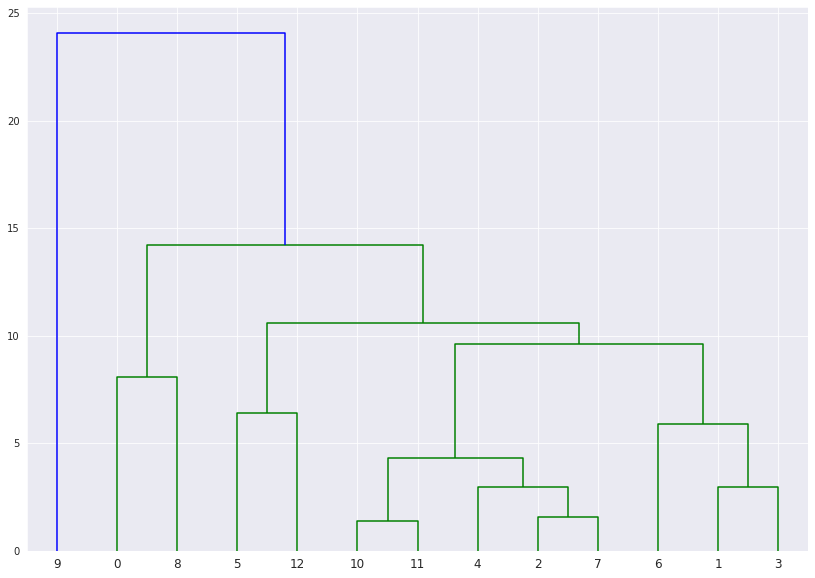

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize = [14,10])
ax = hierarchy.dendrogram(hierarchy.linkage(X_std[y_pred==1], method='ward'))
plt.show()

Utilizaremos a função **.describe()** para obtermos as medidas de média, desvio padrão, valor minimo e valor máximo dos subconjuntos clusterA e clusterB

In [10]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterA

clusterA.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.0
mean,1.004762,3.0,13423.571429,3172.000000,3746.371429,3427.100000,768.219048,1267.142857,0.0
std,0.069007,0.0,13143.314682,3036.782309,3273.984301,4320.421149,1063.684703,1695.110906,0.0
min,1.000000,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.0
25%,1.000000,3.0,3611.750000,1184.750000,1665.000000,779.000000,175.250000,378.250000,0.0
50%,1.000000,3.0,9607.000000,2232.000000,2625.500000,1870.500000,380.000000,821.000000,0.0
75%,1.000000,3.0,18684.000000,4029.500000,4871.750000,4478.500000,940.500000,1556.250000,0.0
max,2.000000,3.0,76237.000000,21858.000000,21042.000000,35009.000000,6907.000000,14472.000000,0.0


In [13]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterB

clusterB.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,1.846154,2.615385,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692,1.0
std,0.375534,0.767948,29454.746986,16997.231895,21744.765824,9962.816466,11945.861812,12776.199522,0.0
min,1.000000,1.000000,85.000000,4980.000000,18148.000000,36.000000,239.000000,903.000000,1.0
25%,2.000000,3.000000,8565.000000,27472.000000,26866.000000,1026.000000,17740.000000,1423.000000,1.0
50%,2.000000,3.000000,16117.000000,29892.000000,33586.000000,3254.000000,19410.000000,2944.000000,1.0
75%,2.000000,3.000000,35942.000000,43950.000000,55571.000000,6746.000000,24231.000000,6465.000000,1.0
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000,1.0


Comparando as médias, valores minimos e máximos obtidos, há diferença entre o subconjunto clusterA e clusterB?

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Há diferença, no cluster 2, apesar de haver apenas 13 observações, os números são muito maiores que no cluster 1, que tem 210 observações. Indo pela intuição, o resultado deveria ser o contrário.
Uma diferença bem presente é o canal, onde o cluster 1 tem uma alta tendência para o canal 1 (Horeca) e o Cluster 2 para o canal 2 (Varejo)

Sendo dois agrupamentos distintos, qual rotulo poderiamos utilizar para identifica-los? Justifique a sua resposta

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Cluster 1: Padrão de consumo baixo (ou talvez Padrão de consumo Horeca). Visto que nesse cluster temos muitas observações e números baixos de consumo e a maioria destas são oriundas da Horeca.

Cluster 2: Padrão de consumo elevado (ou talvez Padrão de consumo Varejo). Visto que nesse cluster temos apenas 13 observações, mas que superam os números do cluster 1, além de serem predominantementes oriundos do Varejo.

# Exercicio 3. (3 pontos)

Responda, quais são as vantagens e desvantagens do algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

A vantagem principal é que é relativamente fácil criar grupos em comum que permitem uma boa visualização e interpretação dos dados. Outras vantagens incluem a relativa simplicidade em implementar, a facilidade de escolher a quantidade de clusters e que todo dado pertence à um grupo.

Sobre as desvantagens, ele sempre vai forçar os dados a pertencer à algum grupo, o que pode ser um problema se o número de clusters não estiver adequado, é sensível aos outliers e é necessário uma boa escolha no número de clusters.

Quantos elementos há em cada clusters se o numero de clusters for igual ao total de observações?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê 

dois cliques para editar)

Tomando como exemplo um número de clusters igual à 10 e o número de observações do dataset igual à 10, logicamente haverá penas 1 observação em cada cluster.

Se o parametro **k** for igual a 1, quantos clusters teremos e quantos elementos há em cada cluster?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Se K = 1, teremos apenas um cluster e todos os elementos pertencerão à este cluster. No caso deste dataset, seriam 440 observações.